In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('alzheimers_disease_data.csv')

df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

X = df.values[:, 0:32]
Y = df.values[:, 32]

normalized_values = StandardScaler().fit_transform(X)
X = pd.DataFrame(normalized_values, columns=df.columns[0:32])

#Principal component analysis
pca = PCA(n_components=2)
pca_values = pca.fit_transform(X)

X_train, X_test, Y_train, Y_test, pca_train, pca_test = train_test_split(X, Y, pca_values, test_size = 0.3, random_state = 0)

In [5]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)

clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print('Accurrasy is ', (accuracy_score(Y_test, predict)*100))

Accurrasy is  70.69767441860465


In [6]:
param_grid = {
    'n_neighbors' : range(1, 100, 1),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

optimal_clf = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
optimal_clf.fit(X_train, Y_train)

print("Best Hyperparameters:", optimal_clf.best_params_)
print("Best Accuracy:", optimal_clf.best_score_)

opt_predict = optimal_clf.predict(X_test)
print('Accurrasy is ', (accuracy_score(Y_test, opt_predict)*100))

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}
Best Accuracy: 0.763280177187154
Accurrasy is  73.48837209302326


In [7]:
pca_clf = neighbors.KNeighborsClassifier(n_neighbors=10)

pca_clf.fit(pca_train, Y_train)
pca_predict = pca_clf.predict(pca_test)
print('Accurrasy is ', (accuracy_score(Y_test, pca_predict)*100))

Accurrasy is  66.51162790697674


In [8]:
optimal_pca_clf = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
optimal_pca_clf.fit(pca_train, Y_train)

print("Best Hyperparameters:", optimal_pca_clf.best_params_)
print("Best Accuracy:", optimal_pca_clf.best_score_)

opt_pca_predict = optimal_pca_clf.predict(pca_test)
print('Accurrasy is ', (accuracy_score(Y_test, opt_pca_predict)*100))

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 40, 'weights': 'uniform'}
Best Accuracy: 0.7087641196013289
Accurrasy is  67.28682170542636


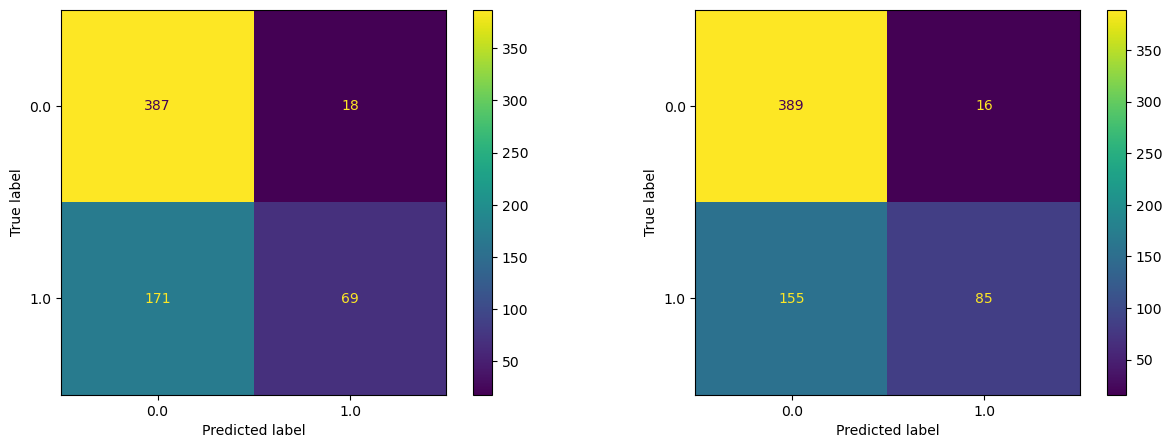

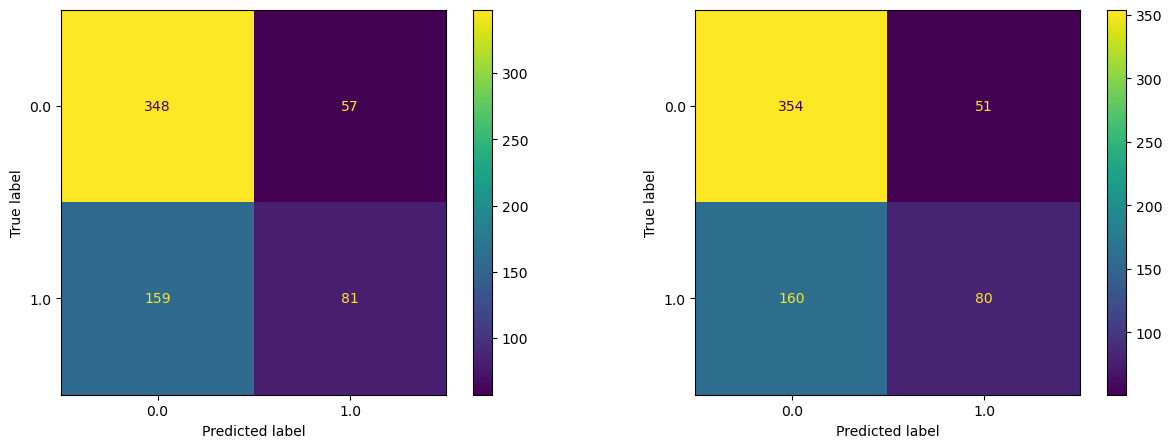

In [9]:
classifiers = [clf, optimal_clf]
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
for ax, classifier in zip(axs, classifiers):
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.show()

pca_classifiers = [pca_clf, optimal_pca_clf]
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
for ax, classifier in zip(axs, pca_classifiers):
    disp = ConfusionMatrixDisplay.from_estimator(classifier, pca_test, Y_test, ax=ax)
plt.show()

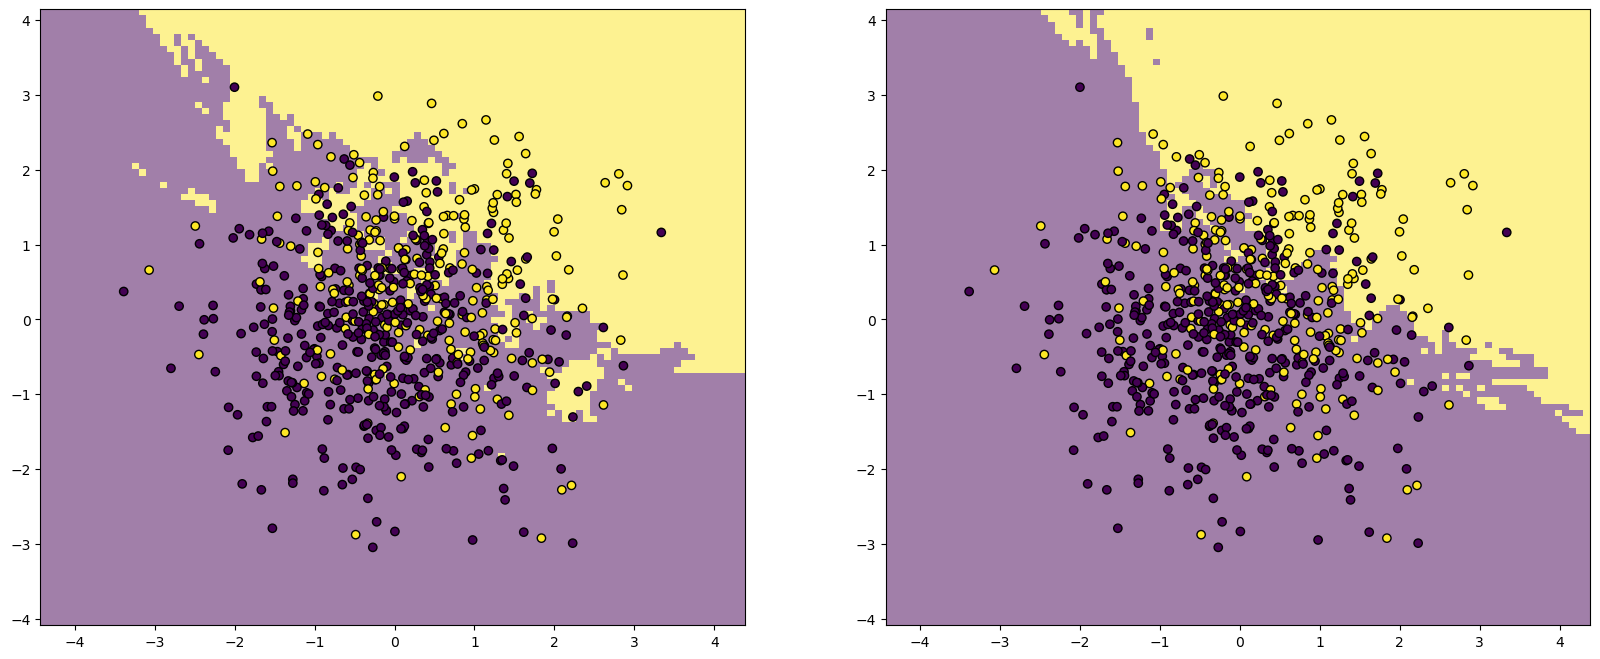

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
for ax, classifier in zip(axs, pca_classifiers):
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        pca_test,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(pca_test[:, 0], pca_test[:, 1], c=Y_test, edgecolors="k")
plt.show()